# Speak Italian

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

dataset_path = 'dataset'

## Data Pre-Processing

In [2]:
df = pd.DataFrame()

for file in os.listdir(dataset_path):
    if file.endswith('csv'):
        df_tmp = pd.read_csv(os.path.join(dataset_path, file), index_col=0)
        df = pd.concat([df, df_tmp], ignore_index=True)

df.rename(columns={'class': 'label'}, inplace=True)
df

WRIST_x   WRIST_y       WRIST_z  THUMB_CMC_x  THUMB_CMC_y  \
0      1.000000  0.872909 -1.968207e-07     0.875184     0.608718   
1      1.000000  0.878121 -1.881866e-07     0.862789     0.620340   
2      1.000000  0.858694 -2.192909e-07     0.862020     0.603069   
3      1.000000  0.842151 -2.070123e-07     0.846271     0.595327   
4      1.000000  0.849508 -2.065656e-07     0.847505     0.599720   
...         ...       ...           ...          ...          ...   
39995  0.488011  1.000000 -1.651959e-08     0.195302     0.885947   
39996  0.482068  1.000000  2.664285e-08     0.183815     0.884363   
39997  0.482388  1.000000 -4.801888e-08     0.167994     0.889221   
39998  0.480928  1.000000  4.329704e-08     0.184242     0.881631   
39999  0.497643  1.000000 -2.092725e-08     0.193260     0.887141   

       THUMB_CMC_z  THUMB_MCP_x  THUMB_MCP_y  THUMB_MCP_z  THUMBJP_x  ...  \
0        -0.002624     0.650712     0.369616    -0.014030   0.520465  ...   
1         0.000062     0.614220     0.382791    -0.008956   0.471805  ...   
2        -0.002035     0.637268     0.371481    -0.014257   0.486676  ...   
3         0.000033     0.611688     0.364969    -0.010301   0.459956  ...   
4        -0.002094     0.611284     0.372763    -0.013187   0.455480  ...   
...            ...          ...          ...          ...        ...  ...   
39995    -0.041598     0.077980     0.718842    -0.067070   0.351577  ...   
39996    -0.046728     0.077332     0.709730    -0.074102   0.364574  ...   
39997    -0.039481     0.042497     0.717056    -0.063866   0.325856  ...   
39998    -0.047746     0.072255     0.711259    -0.076533   0.359986  ...   
39999    -0.043755     0.076687     0.714473    -0.069705   0.361549  ...   

       PINKY_PIP_x  PINKY_PIP_y  PINKY_PIP_z  PINKY_DIP_x  PINKY_DIP_y  \
0         0.154488     0.986911    -0.058398     0.281356     1.000000   
1         0.150638     0.992691    -0.060480     0.277351     1.000000   
2         0.170557     0.987890    -0.065571     0.304748     1.000000   
3         0.174928     0.993973    -0.059177     0.309409     1.000000   
4         0.184911     0.990946    -0.056625     0.317406     1.000000   
...            ...          ...          ...          ...          ...   
39995     1.000000     0.435658    -0.078212     0.852352     0.528663   
39996     1.000000     0.447938    -0.079460     0.848228     0.541367   
39997     1.000000     0.441341    -0.083422     0.820906     0.536067   
39998     1.000000     0.440410    -0.075669     0.865633     0.535178   
39999     1.000000     0.446152    -0.078914     0.848394     0.543323   

       PINKY_DIP_z  PINKY_TIP_x  PINKY_TIP_y  PINKY_TIP_z          label  
0        -0.047085     0.417597     0.986051    -0.037384  thumbUp_right  
1        -0.049276     0.407005     0.983964    -0.039349  thumbUp_right  
2        -0.053247     0.435731     0.979856    -0.042585  thumbUp_right  
3        -0.047765     0.438565     0.976286    -0.037782  thumbUp_right  
4        -0.044772     0.442029     0.978218    -0.034590  thumbUp_right  
...            ...          ...          ...          ...            ...  
39995    -0.063130     0.753735     0.607865    -0.045138    index_right  
39996    -0.066614     0.760671     0.619656    -0.048787    index_right  
39997    -0.068965     0.723404     0.617098    -0.050429    index_right  
39998    -0.062414     0.786649     0.615529    -0.044629    index_right  
39999    -0.063793     0.768783     0.625144    -0.043926    index_right  

[40000 rows x 64 columns]

In [3]:
# Select only the tuples for the right hand

dataset = df[df['label'].apply(lambda x: x.endswith('right'))].copy()
dataset.reset_index(drop=True, inplace=True)
dataset['label'] = dataset['label'].apply(lambda x: x.split('_')[0])
dataset

WRIST_x   WRIST_y       WRIST_z  THUMB_CMC_x  THUMB_CMC_y  \
0      1.000000  0.872909 -1.968207e-07     0.875184     0.608718   
1      1.000000  0.878121 -1.881866e-07     0.862789     0.620340   
2      1.000000  0.858694 -2.192909e-07     0.862020     0.603069   
3      1.000000  0.842151 -2.070123e-07     0.846271     0.595327   
4      1.000000  0.849508 -2.065656e-07     0.847505     0.599720   
...         ...       ...           ...          ...          ...   
19995  0.488011  1.000000 -1.651959e-08     0.195302     0.885947   
19996  0.482068  1.000000  2.664285e-08     0.183815     0.884363   
19997  0.482388  1.000000 -4.801888e-08     0.167994     0.889221   
19998  0.480928  1.000000  4.329704e-08     0.184242     0.881631   
19999  0.497643  1.000000 -2.092725e-08     0.193260     0.887141   

       THUMB_CMC_z  THUMB_MCP_x  THUMB_MCP_y  THUMB_MCP_z  THUMBJP_x  ...  \
0        -0.002624     0.650712     0.369616    -0.014030   0.520465  ...   
1         0.000062     0.614220     0.382791    -0.008956   0.471805  ...   
2        -0.002035     0.637268     0.371481    -0.014257   0.486676  ...   
3         0.000033     0.611688     0.364969    -0.010301   0.459956  ...   
4        -0.002094     0.611284     0.372763    -0.013187   0.455480  ...   
...            ...          ...          ...          ...        ...  ...   
19995    -0.041598     0.077980     0.718842    -0.067070   0.351577  ...   
19996    -0.046728     0.077332     0.709730    -0.074102   0.364574  ...   
19997    -0.039481     0.042497     0.717056    -0.063866   0.325856  ...   
19998    -0.047746     0.072255     0.711259    -0.076533   0.359986  ...   
19999    -0.043755     0.076687     0.714473    -0.069705   0.361549  ...   

       PINKY_PIP_x  PINKY_PIP_y  PINKY_PIP_z  PINKY_DIP_x  PINKY_DIP_y  \
0         0.154488     0.986911    -0.058398     0.281356     1.000000   
1         0.150638     0.992691    -0.060480     0.277351     1.000000   
2         0.170557     0.987890    -0.065571     0.304748     1.000000   
3         0.174928     0.993973    -0.059177     0.309409     1.000000   
4         0.184911     0.990946    -0.056625     0.317406     1.000000   
...            ...          ...          ...          ...          ...   
19995     1.000000     0.435658    -0.078212     0.852352     0.528663   
19996     1.000000     0.447938    -0.079460     0.848228     0.541367   
19997     1.000000     0.441341    -0.083422     0.820906     0.536067   
19998     1.000000     0.440410    -0.075669     0.865633     0.535178   
19999     1.000000     0.446152    -0.078914     0.848394     0.543323   

       PINKY_DIP_z  PINKY_TIP_x  PINKY_TIP_y  PINKY_TIP_z    label  
0        -0.047085     0.417597     0.986051    -0.037384  thumbUp  
1        -0.049276     0.407005     0.983964    -0.039349  thumbUp  
2        -0.053247     0.435731     0.979856    -0.042585  thumbUp  
3        -0.047765     0.438565     0.976286    -0.037782  thumbUp  
4        -0.044772     0.442029     0.978218    -0.034590  thumbUp  
...            ...          ...          ...          ...      ...  
19995    -0.063130     0.753735     0.607865    -0.045138    index  
19996    -0.066614     0.760671     0.619656    -0.048787    index  
19997    -0.068965     0.723404     0.617098    -0.050429    index  
19998    -0.062414     0.786649     0.615529    -0.044629    index  
19999    -0.063793     0.768783     0.625144    -0.043926    index  

[20000 rows x 64 columns]

In [4]:
X, y = dataset.loc[:, ~dataset.columns.isin(['label'])], dataset['label']
n_samples = X.shape[0]
n_features = dataset.shape[1]
labels = list(y.unique())

All attributes in our dataset are numerical
* 10 classes
* 20000 total instances
* 2000 instances for each class (equifrequent classes)
* 63 features per instance (21 points in 3D space)

In [18]:
dataset.describe()

WRIST_x       WRIST_y       WRIST_z   THUMB_CMC_x   THUMB_CMC_y  \
count  20000.000000  20000.000000  2.000000e+04  20000.000000  20000.000000   
mean       0.823214      0.885048 -9.262621e-08      0.583443      0.765117   
std        0.202210      0.239339  5.342397e-07      0.280580      0.172208   
min        0.172296      0.000000 -1.172614e-06      0.000000      0.114005   
25%        0.668409      0.887208 -4.723977e-07      0.323097      0.622694   
50%        0.911265      1.000000 -2.042777e-07      0.567577      0.855964   
75%        1.000000      1.000000  3.733964e-07      0.869011      0.898273   
max        1.000000      1.000000  1.313673e-06      1.000000      1.000000   

        THUMB_CMC_z   THUMB_MCP_x   THUMB_MCP_y   THUMB_MCP_z     THUMBJP_x  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      -0.016060      0.380671      0.597743     -0.029313      0.313893   
std        0.016994      0.292078      0.157344      0.022485      0.258797   
min       -0.080715      0.000000      0.000000     -0.131633      0.000000   
25%       -0.026792      0.111141      0.411202     -0.042376      0.099149   
50%       -0.016236      0.326028      0.655963     -0.027405      0.224122   
75%       -0.004514      0.665529      0.715841     -0.014524      0.536302   
max        0.080103      0.987150      1.000000      0.094243      0.963468   

       ...   PINKY_MCP_z   PINKY_PIP_x   PINKY_PIP_y   PINKY_PIP_z  \
count  ...  20000.000000  20000.000000  20000.000000  20000.000000   
mean   ...     -0.050218      0.647447      0.506971     -0.068096   
std    ...      0.029753      0.336949      0.330325      0.033063   
min    ...     -0.166516      0.000000      0.000000     -0.197845   
25%    ...     -0.066871      0.283741      0.281184     -0.091593   
50%    ...     -0.044418      0.809878      0.421955     -0.065989   
75%    ...     -0.029231      0.949182      0.905591     -0.045095   
max    ...      0.073035      1.000000      1.000000      0.106452   

        PINKY_DIP_x   PINKY_DIP_y   PINKY_DIP_z   PINKY_TIP_x   PINKY_TIP_y  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       0.625143      0.514098     -0.060185      0.628693      0.506680   
std        0.301467      0.334472      0.034981      0.301589      0.359031   
min        0.000000      0.000000     -0.189538      0.000000      0.000000   
25%        0.324824      0.232525     -0.085560      0.406589      0.151635   
50%        0.695968      0.444804     -0.058472      0.678072      0.522415   
75%        0.895774      0.895750     -0.036507      0.877416      0.888727   
max        1.000000      1.000000      0.137856      1.000000      1.000000   

        PINKY_TIP_z  
count  20000.000000  
mean      -0.049573  
std        0.038407  
min       -0.195705  
25%       -0.074970  
50%       -0.049205  
75%       -0.020768  
max        0.145454  

[8 rows x 63 columns]

### Data Visualization - Histogram

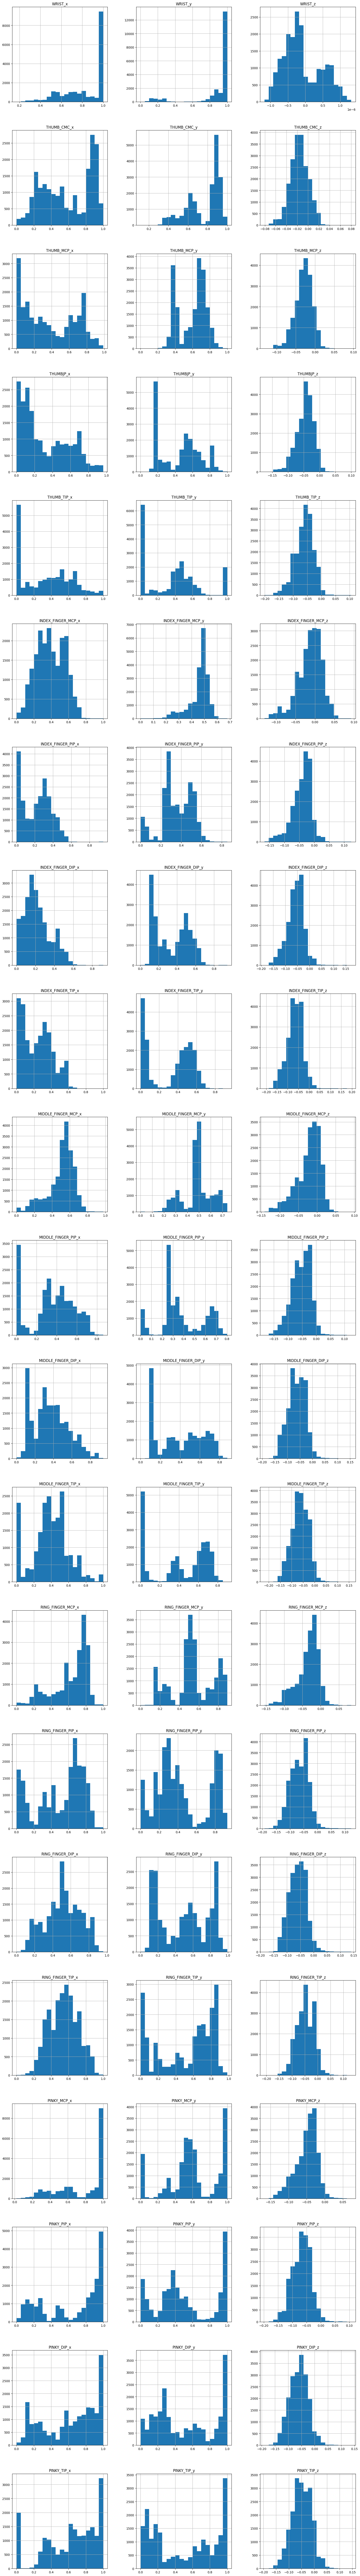

In [19]:
X.hist(bins=20, figsize=(20,150), layout=(21,3));

For all points the z-coordinate seems to follow the normal distribution. This suggests that they are less significant.

### Data Visualization - Boxplot

In [6]:
cols = list(dataset.columns)
cols.remove('label')
dataset.boxplot(column=cols, by='label', layout=(21,3), figsize=(50,400))
plt.show()

In [ ]:
dataset.boxplot(column=list(X.columns), by='label', layout=(21,3), figsize=(50,400))
plt.show()

### Dimensionality Reduction - PCA

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (20000, 9)


In [8]:
gestures = list(y.squeeze().unique())
mapping = {k:v for (k,v) in zip(gestures, range(10))}
color = [mapping[gest[0]] for gest in y.values]

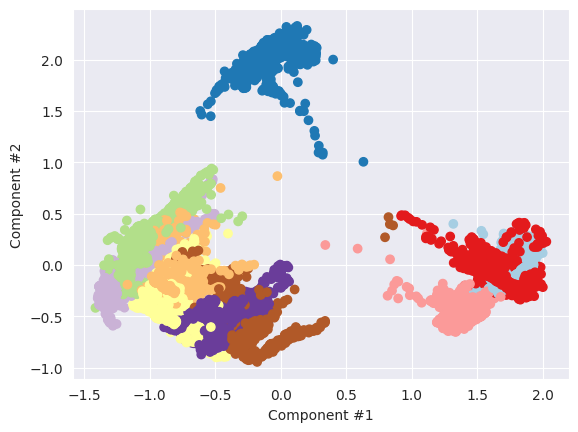

In [9]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap='Paired')
plt.xlabel('Component #1')
plt.ylabel('Component #2')
plt.show()

## Classification

In [6]:
classifier_comparison = {}

### Train and Test a classifier (using StratifiedKFold validation)

In [19]:

import time
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

def create_classifier(classifier, display=False):

    skf = StratifiedKFold(n_splits=5)

    list_df = []
    list_accuracy = []

    k = 1
    start_time = time.time()
    for train, val in skf.split(X_reduced, y):
        # fit and predict using pipeline
        X_tr = X_reduced[train]
        y_tr = y[train]
        X_val = X_reduced[val]
        y_val = y[val]

        clf = classifier
        clf.fit(X_tr,y_tr)
        y_pred = clf.predict(X_val)

        # compute classification report
        cr = classification_report(y_val, y_pred, output_dict = True)
        if display:
            print(f'FOLD {k}')
            print(classification_report(y_val,y_pred))
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        if display:
            display(df)
        list_df.append(df)
        k+=1

    elapsed_time = time.time() - start_time


    # compute average per-class metrics
    df_concat = pd.concat(list_df)
    grouped_by_row_index = df_concat.groupby(df_concat.index)
    df_avg = grouped_by_row_index.mean()

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)

    classifier_comparison[str(classifier)] = {'accuracy_avg': accuracy_avg, 'df_avg': df_avg, 'time_elapsed': elapsed_time}


In [24]:
classifier_comparison

{'KNeighborsClassifier(n_neighbors=10)': {'accuracy_avg': 0.9804999999999999,
  'df_avg':                  call        fist         gun       index        okay  \
  f1-score     0.993425    0.929300    0.998748    0.943402    0.975317   
  precision    0.995415    0.986986    1.000000    0.933256    0.975678   
  recall       0.991500    0.901500    0.997500    0.967000    0.977000   
  support    400.000000  400.000000  400.000000  400.000000  400.000000   
  
                  peace        rock        stop   thumbDown     thumbUp  \
  f1-score     0.995829    0.994398    0.973796    0.999500    0.994837   
  precision    0.991809    0.989075    0.977453    0.999501    0.991328   
  recall       1.000000    1.000000    0.972500    0.999500    0.998500   
  support    400.000000  400.000000  400.000000  400.000000  400.000000   
  
               macro avg  weighted avg  
  f1-score      0.979855      0.979855  
  precision     0.984050      0.984050  
  recall        0.980500      0.9

### Naive Bayesian Classifier

In [28]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
create_classifier(model)
classifier_comparison[str(model)]

{'accuracy_avg': 0.95915,
 'df_avg':                  call        fist         gun       index        okay  \
 f1-score     0.956898    0.994323    0.996226    0.978125    0.871147   
 precision    0.935002    0.990275    1.000000    0.990080    0.862144   
 recall       0.986000    0.998500    0.992500    0.968000    0.913000   
 support    400.000000  400.000000  400.000000  400.000000  400.000000   
 
                 peace        rock        stop   thumbDown     thumbUp  \
 f1-score     0.987643    0.998742    0.851330    0.998238    0.947413   
 precision    0.980064    1.000000    0.931163    1.000000    0.985129   
 recall       0.996000    0.997500    0.820000    0.996500    0.923500   
 support    400.000000  400.000000  400.000000  400.000000  400.000000   
 
              macro avg  weighted avg  
 f1-score      0.958008      0.958008  
 precision     0.967386      0.967386  
 recall        0.959150      0.959150  
 support    4000.000000   4000.000000  ,
 'time_elapsed': 0.

### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
create_classifier(model)
classifier_comparison[str(model)]

{'accuracy_avg': 0.9542499999999998,
 'df_avg':                  call        fist         gun       index        okay  \
 f1-score     0.972912    0.954728    0.996234    0.914945    0.893857   
 precision    0.955773    0.971020    0.998020    0.924544    0.883998   
 recall       0.992500    0.942500    0.994500    0.910000    0.906000   
 support    400.000000  400.000000  400.000000  400.000000  400.000000   
 
                 peace        rock        stop   thumbDown     thumbUp  \
 f1-score     0.985290    0.965967    0.884796    0.999002    0.972497   
 precision    0.977156    0.963608    0.898322    0.998511    0.991732   
 recall       0.994500    0.971500    0.874000    0.999500    0.957500   
 support    400.000000  400.000000  400.000000  400.000000  400.000000   
 
              macro avg  weighted avg  
 f1-score      0.954023      0.954023  
 precision     0.956268      0.956268  
 recall        0.954250      0.954250  
 support    4000.000000   4000.000000  ,
 'time_e

### K-NN Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
create_classifier(model)
classifier_comparison[str(model)]['accuracy_avg']

0.9823999999999999

### Support Vector Classifier

In [21]:
from sklearn.svm import SVC

model = SVC()
create_classifier(model)
classifier_comparison[str(model)]['accuracy_avg']

0.9937000000000001

## Comparison between Models

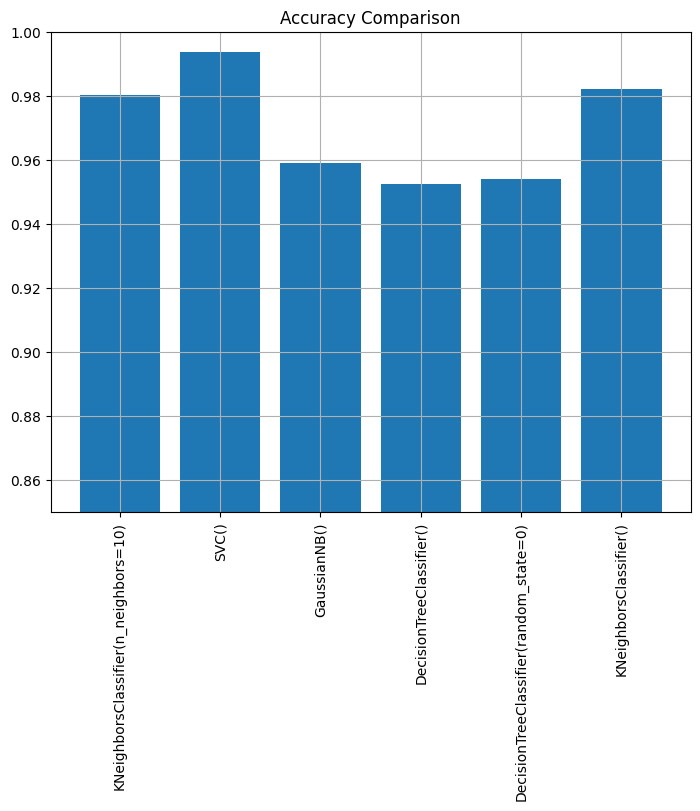

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
avg_accuracies = [classifier_comparison[x]['accuracy_avg'] for x in classifier_comparison]
ax.bar(classifier_comparison.keys(), avg_accuracies)
plt.title('Accuracy Comparison')
plt.grid()
plt.ylim([0.85, 1])
plt.xticks(rotation=90)
plt.show()

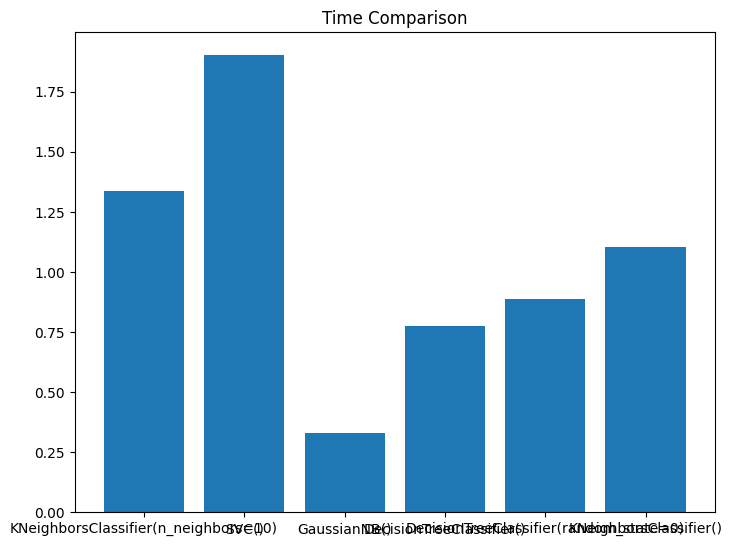

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
times_elapsed = [classifier_comparison[x]['time_elapsed'] for x in classifier_comparison]
ax.bar(classifier_comparison.keys(), times_elapsed)
plt.title('Time Comparison')
plt.show()

# Real Time Demostration

In [10]:
import cv2
import numpy as np
import mediapipe as mp
from dataset.scripts.utils import normalize, create_dict

BATCH_SIZE = 20

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.5)
mp_draw = mp.solutions.drawing_utils


# initialize webcam
cap = cv2.VideoCapture(0)


while True:
    _, frame = cap.read()
    frame = cv2.flip(frame,1)


    results = hands.process(frame)
    #print(results.multi_hand_landmarks)


    if results.multi_hand_landmarks:
        landmarks = []
        hand_lms = results.multi_hand_landmarks[0]

        for enu, lm in enumerate(hand_lms.landmark):
            landmarks.append([lm.x, lm.y, lm.z])

        # normalize landmarks
        landmarks = normalize(landmarks)

        dictionary = create_dict(landmarks, None)
        new_data = pd.DataFrame([dictionary]).drop(columns=["class"])

        mp_draw.draw_landmarks(frame, hand_lms, mp_hands.HAND_CONNECTIONS)
        landmarks_reduced = pca.transform(new_data)

        output = model.predict(landmarks_reduced)[0]
        print(output)
        cv2.putText(frame,
                    output,
                    (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1,
                    (0, 255, 255),
                    2,
                    cv2.LINE_4)


    cv2.imshow("SpeakItalian", frame)
    try:
        if cv2.waitKey(1) == ord('q'):
            break
    except Exception:
        break

cap.release()

rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
rock
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
stop
index
stop
fist
gun
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
thumbUp
call
fist
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
thumbDown
okay
peace
peace
peace
peace
peace
peace
p


KeyboardInterrupt

